In [1]:
 # Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
%cd  ~/Desktop/food_detection/food-101/

/Users/virginia/Desktop/food_detection/food-101


In [3]:
print("Classes of food items:\n\n")
os.listdir('/Users/virginia/Desktop/food_detection/food-101/images/')

Classes of food items:




['foie_gras',
 'club_sandwich',
 'cheese_plate',
 'cup_cakes',
 'garlic_bread',
 'gnocchi',
 'ice_cream',
 'samosa',
 'donuts',
 'tuna_tartare',
 'filet_mignon',
 'seaweed_salad',
 'french_toast',
 'chicken_curry',
 'shrimp_and_grits',
 'steak',
 'cheesecake',
 'red_velvet_cake',
 'waffles',
 'churros',
 'gyoza',
 'lobster_roll_sandwich',
 'huevos_rancheros',
 'breakfast_burrito',
 'grilled_cheese_sandwich',
 'spaghetti_bolognese',
 'falafel',
 'poutine',
 'greek_salad',
 'beef_tartare',
 'fried_calamari',
 'guacamole',
 'ravioli',
 'lobster_bisque',
 'beet_salad',
 'risotto',
 'crab_cakes',
 'strawberry_shortcake',
 'edamame',
 'ceviche',
 'hot_and_sour_soup',
 'spring_rolls',
 'sashimi',
 'paella',
 'clam_chowder',
 'miso_soup',
 'escargots',
 'hot_dog',
 'pulled_pork_sandwich',
 'bruschetta',
 'panna_cotta',
 'fish_and_chips',
 'pad_thai',
 'tiramisu',
 'takoyaki',
 'macarons',
 'apple_pie',
 'cannoli',
 'scallops',
 'frozen_yogurt',
 'chicken_quesadilla',
 'mussels',
 'beef_carpacc

In [4]:
%cd /Users/virginia/Desktop/food_detection/

/Users/virginia/Desktop/food_detection


In [5]:
import os
import shutil
import random

# 原始数据集路径
dataset_dir = "food-101/images"

# 输出的训练和测试目录
train_dir = "food-101/train"
test_dir = "food-101/test"

# 确保目标目录存在
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 遍历每一个食物类别目录
for food_class in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, food_class)
    if not os.path.isdir(class_path):
        continue
    
    # 读取该类别下的所有图片
    images = os.listdir(class_path)
    random.shuffle(images)  # 打乱顺序
    
    # 按比例划分
    split_index = int(0.75 * len(images))
    train_images = images[:split_index]
    test_images = images[split_index:]
    
    # 创建该类别在 train/test 下的目录
    train_class_dir = os.path.join(train_dir, food_class)
    test_class_dir = os.path.join(test_dir, food_class)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # 复制图片到对应目录
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))
    
    print(f"{food_class}: {len(train_images)} train, {len(test_images)} test")

print("数据划分完成！")


foie_gras: 750 train, 250 test
club_sandwich: 750 train, 250 test
cheese_plate: 750 train, 250 test
cup_cakes: 750 train, 250 test
garlic_bread: 750 train, 250 test
gnocchi: 750 train, 250 test
ice_cream: 750 train, 250 test
samosa: 750 train, 250 test
donuts: 750 train, 250 test
tuna_tartare: 750 train, 250 test
filet_mignon: 750 train, 250 test
seaweed_salad: 750 train, 250 test
french_toast: 750 train, 250 test
chicken_curry: 750 train, 250 test
shrimp_and_grits: 750 train, 250 test
steak: 750 train, 250 test
cheesecake: 750 train, 250 test
red_velvet_cake: 750 train, 250 test
waffles: 750 train, 250 test
churros: 750 train, 250 test
gyoza: 750 train, 250 test
lobster_roll_sandwich: 750 train, 250 test
huevos_rancheros: 750 train, 250 test
breakfast_burrito: 750 train, 250 test
grilled_cheese_sandwich: 750 train, 250 test
spaghetti_bolognese: 750 train, 250 test
falafel: 750 train, 250 test
poutine: 750 train, 250 test
greek_salad: 750 train, 250 test
beef_tartare: 750 train, 250 te

In [6]:
%cd /Users/virginia/Desktop/food_detection/food-101/train/


print("\nTotal number of classes of images in the train folder: ")
train_samples = os.listdir()
train_files = len(train_samples)
print(train_files)

/Users/virginia/Desktop/food_detection/food-101/train

Total number of classes of images in the train folder: 
101


In [26]:
# create sample data
def create_sample_data(list_food_items, source, destination):
    print("\nPreparing...")
    if os.path.exists(destination):
        rmtree(destination)
    os.makedirs(destination)
    for item in list_food_items :
        copytree(os.path.join(source, item), os.path.join(destination, item))
    print("\nDone!")

In [7]:
list_food_items = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']
len(list_food_items)

101

In [8]:
%cd /Users/virginia/Desktop/food_detection/food-101/

/Users/virginia/Desktop/food_detection/food-101


In [9]:
%ls

ckpt2_epoch1.pth                    food_test_c101_n1000_r128x128x1.h5
ckpt2_epoch10.pth                   food_test_c101_n1000_r128x128x3.h5
ckpt2_epoch12.pth                   food_test_c101_n1000_r32x32x1.h5
ckpt2_epoch2.pth                    food_test_c101_n1000_r32x32x3.h5
ckpt2_epoch4.pth                    food_test_c101_n1000_r64x64x1.h5
ckpt2_epoch5.pth                    food_test_c101_n1000_r64x64x3.h5
ckpt2_epoch6.pth                    images/
ckpt2_epoch8.pth                    meta/
ckpt2_epoch9.pth                    runs/
ckpt_epoch1.pth                     test/
ckpt_epoch3.pth                     test_new/
food_c101_n1000_r384x384x3.h5       train/
food_c101_n10099_r32x32x1.h5        train_new/
food_c101_n10099_r32x32x3.h5        v2_model_resnet50.pt
food_c101_n10099_r64x64x1.h5        v_model_resnet50.pt
food_c101_n10099_r64x64x3.h5


In [31]:


source_train = 'train'
destination_train = 'train_new'
source_test = 'test'
destination_test = 'test_new'

print("Creating train data folder with new classes")
create_sample_data(list_food_items, source_train, destination_train)

print("\nCreating test data folder with new classes")
create_sample_data(list_food_items, source_test, destination_test)

Creating train data folder with new classes

Preparing...

Done!

Creating test data folder with new classes

Preparing...

Done!


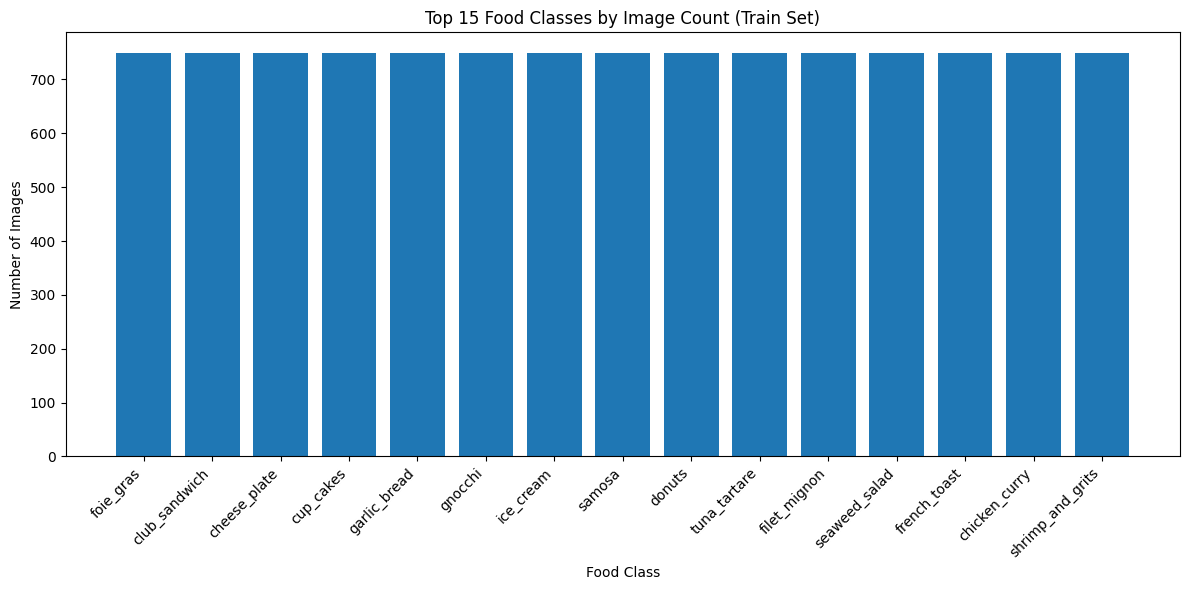

In [10]:
import os
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path


train_path = Path("/Users/virginia/Desktop/food_detection/food-101/train_new")


def count_images_per_class(data_path):
    class_counts = {}
    for class_folder in data_path.iterdir():
        if class_folder.is_dir():
            num_images = len(list(class_folder.glob("*.jpg")))
            class_counts[class_folder.name] = num_images
    return class_counts

train_counts = count_images_per_class(train_path)


top_n = 15
top_train_classes = dict(Counter(train_counts).most_common(top_n))


plt.figure(figsize=(12, 6))
plt.bar(top_train_classes.keys(), top_train_classes.values())
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Food Classes by Image Count (Train Set)")
plt.xlabel("Food Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


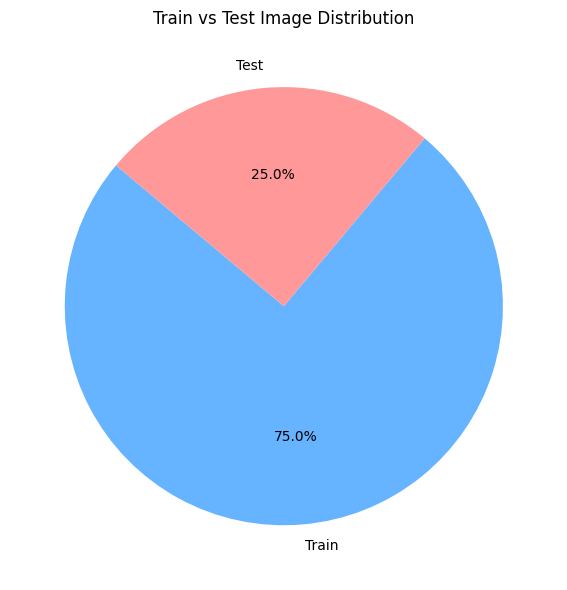

In [11]:
test_path = Path("/Users/virginia/Desktop/food_detection/food-101/test_new")
test_counts = count_images_per_class(test_path)

train_total = sum(train_counts.values())
test_total = sum(test_counts.values())

plt.figure(figsize=(6, 6))
plt.pie([train_total, test_total],
        labels=['Train', 'Test'],
        autopct='%1.1f%%',
        colors=['#66b3ff', '#ff9999'],
        startangle=140)
plt.title("Train vs Test Image Distribution")
plt.tight_layout()
plt.show()


In [16]:
# decided to use torch model
from tqdm import tqdm
from PIL import Image
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision.models.resnet import resnet50
from torch_lr_finder import LRFinder

In [17]:
train_transforms = torchvision.transforms.Compose([
        torchvision.transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1),
        torchvision.transforms.RandomAffine(15),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(15),
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
test_transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

In [18]:
train_dataset = torchvision.datasets.ImageFolder('/Users/virginia/Desktop/food_detection/food-101/train_new', transform=train_transforms)
test_dataset = torchvision.datasets.ImageFolder('/Users/virginia/Desktop/food_detection/food-101/test_new', transform=test_transforms)

In [19]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True,
                                           num_workers=4, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=False,
                                          num_workers=4, pin_memory=True)

In [20]:
def visualize_images(dataloader):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    figure, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
    classes = list(dataloader.dataset.class_to_idx.keys())
    img_no = 0
    rows = 4
    cols = 4
    for images, labels in dataloader:
        for i in range(rows):
            for j in range(cols):
                img = np.array(images[img_no]).transpose(1, 2, 0)
                lbl = labels[img_no]

                ax[i, j].imshow((img*std)+mean)
                ax[i, j].set_title(classes[lbl])
                ax[i, j].set_axis_off()
                img_no += 1
        break

---------------------------Sample Images from the train dataset---------------------------



/var/folders/zy/5d7x2hbs6g11706_3c8sg2sw0000gn/T/ipykernel_81338/2649657521.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img = np.array(images[img_no]).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9568628070354462].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.8274509849548339].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB dat

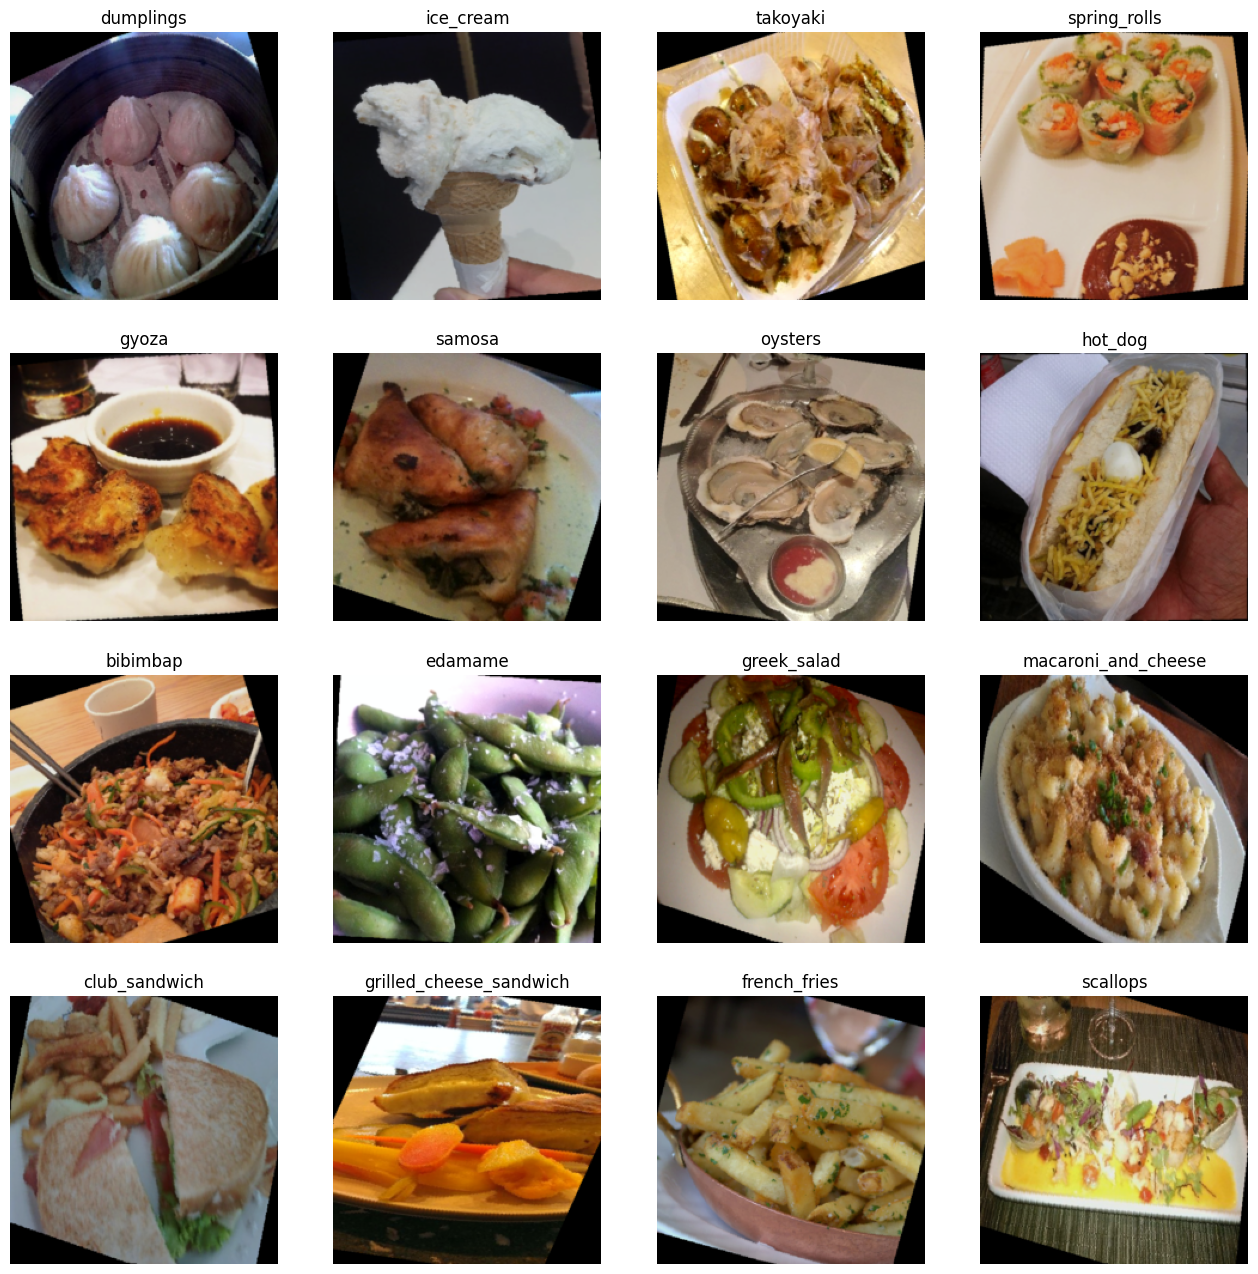

In [21]:
print("---------------------------Sample Images from the train dataset---------------------------\n")
visualize_images(train_loader)

---------------------------Sample Images from the test dataset---------------------------


/var/folders/zy/5d7x2hbs6g11706_3c8sg2sw0000gn/T/ipykernel_81338/2649657521.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img = np.array(images[img_no]).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.7418136649970393e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.7418136649970393e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000076293944].
Clipping input data to the valid range for imshow with RGB dat

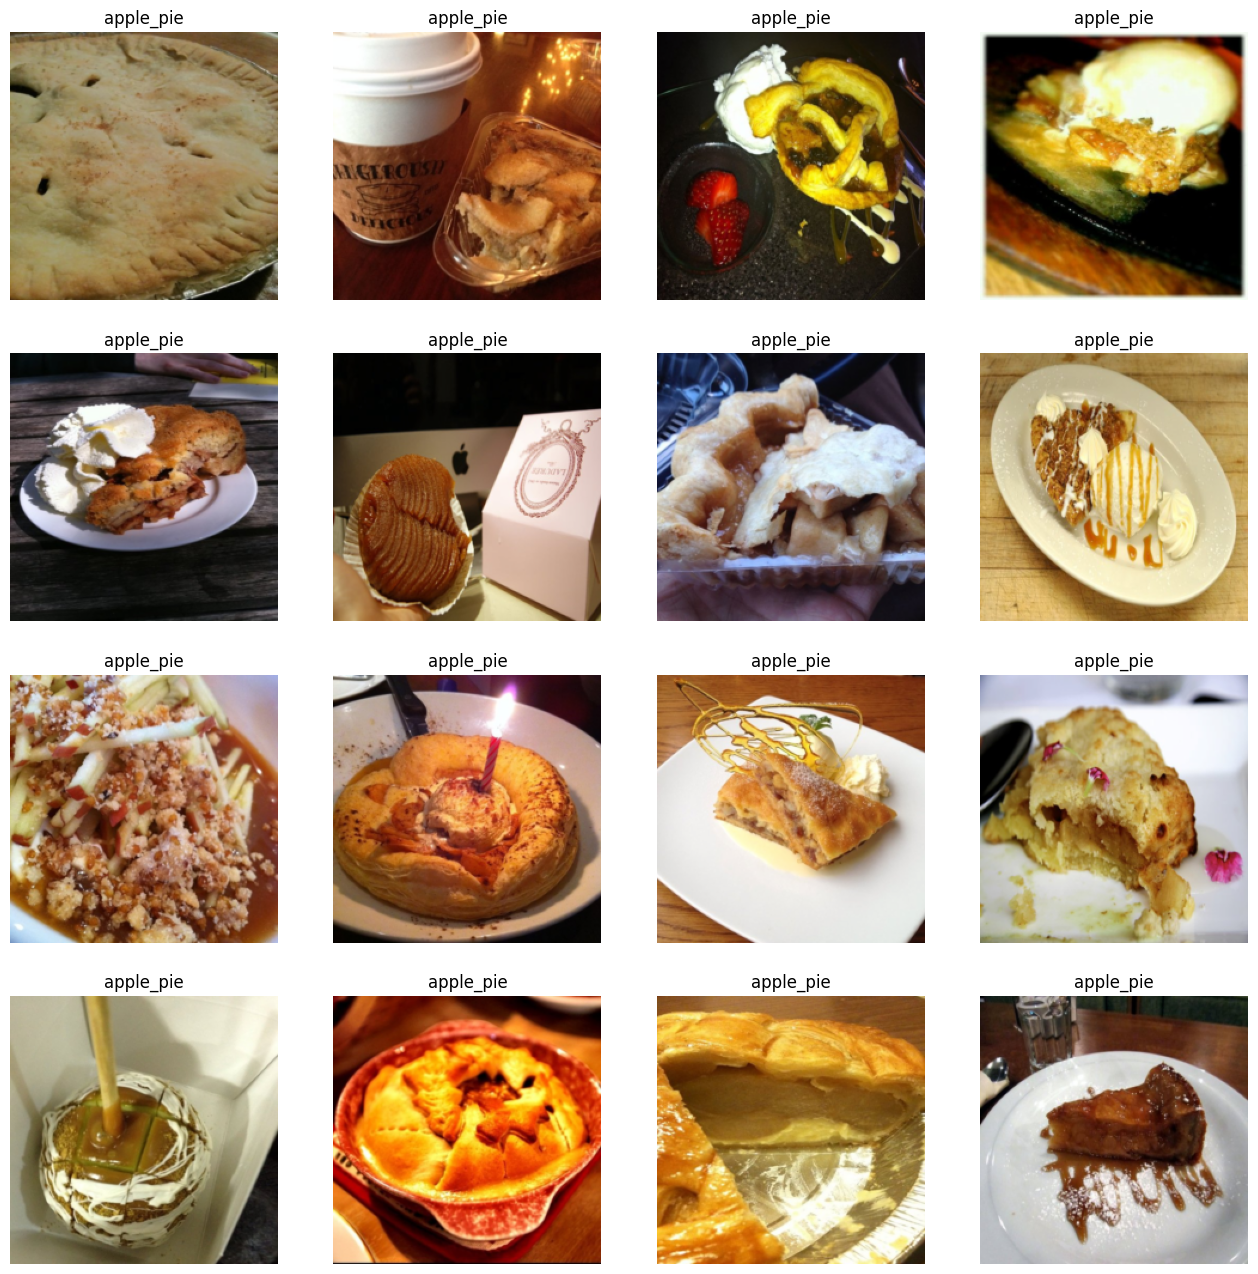

In [22]:
print("---------------------------Sample Images from the test dataset---------------------------")
visualize_images(test_loader)

In [25]:
import torch, torch.nn as nn
import torchvision.models as M
import torchvision.transforms as T

num_classes = 101
device = torch.device("mps" if torch.backends.mps.is_available()
          else "cuda" if torch.cuda.is_available() else "cpu")

# 1) 取权重枚举，注意不要用变量名 weights（容易和别处冲突）
vit_weights = M.ViT_B_16_Weights.IMAGENET1K_V1

# 2) 构建模型并改分类头
model = M.vit_b_16(weights=vit_weights)
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)
model.to(device)

# 3) 拿验证/推理 transforms（不同版本兼容）
try:
    # 新版本：weights.transforms() 是一个可调用的方法
    val_transforms = vit_weights.transforms()
    mean, std = vit_weights.meta["mean"], vit_weights.meta["std"]
except Exception:
    # 兜底：用 ImageNet 统计值 + 常规 Resize/CenterCrop
    mean = [0.485, 0.456, 0.406]
    std  = [0.229, 0.224, 0.225]
    val_transforms = T.Compose([
        T.Resize(232),           # ViT 官方默认 224，常配 232→224 的中心裁剪
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize(mean, std),
    ])

# 4) 训练增强（在与 val 同步的 ToTensor/Normalize 之前加随机增强）
train_transforms = T.Compose([
    T.RandomResizedCrop(224, scale=(0.6, 1.0)),
    T.RandomHorizontalFlip(),
    T.ColorJitter(0.2, 0.2, 0.2, 0.1),
    T.ToTensor(),
    T.Normalize(mean, std),
])


In [26]:
print("type of weights:", type(weights))


type of weights: <enum 'ViT_B_16_Weights'>


In [28]:
print("ResNet Model:\n")
model

ResNet Model:



VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [29]:
from PIL import Image
img = Image.new("RGB", (256, 256), color="white")
x = val_transforms(img).unsqueeze(0).to(device)
with torch.no_grad(), torch.autocast(device.type, torch.float16 if device.type!="cpu" else torch.float32):
    logits = model(x)
print("logits shape:", logits.shape)  # 应该是 [1, 101]


logits shape: torch.Size([1, 101])


In [30]:
import os, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# ========= 配置 =========
#train_dir = "/path/to/food-101/train"
val_dir   = test_dir # "/path/to/food-101/val"
batch_size = 64
num_workers = 4
epochs = 30
patience = 6                # Early Stopping 容忍次数
save_dir = "./checkpoints_vit"
os.makedirs(save_dir, exist_ok=True)

In [31]:
device = torch.device("mps" if torch.backends.mps.is_available()
          else "cuda" if torch.cuda.is_available() else "cpu")
use_autocast = device.type in ("mps", "cuda")
amp_dtype = torch.float16 if use_autocast else torch.float32


In [34]:
train_dir = '/Users/virginia/Desktop/food_detection/food-101/train'
train_dir

'/Users/virginia/Desktop/food_detection/food-101/train'

In [36]:
val_dir = '/Users/virginia/Desktop/food_detection/food-101/test'
val_dir

'/Users/virginia/Desktop/food_detection/food-101/test'

In [37]:
# ========= DataLoader =========
train_ds = ImageFolder(train_dir, transform=train_transforms)
val_ds   = ImageFolder(val_dir,   transform=val_transforms)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, persistent_workers=True,
                          prefetch_factor=2, pin_memory=False)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, persistent_workers=True,
                          prefetch_factor=2, pin_memory=False)

In [38]:
# ========= 模型 / 损失 / 优化器 / 调度 =========
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-2)


In [39]:
# 选一种调度器：OneCycle（每 step 调）或 Cosine（每 epoch 调）
use_onecycle = True
if use_onecycle:
    scheduler = optim.lr_scheduler.OneCycleLR(
        optimizer, max_lr=3e-4, epochs=epochs, steps_per_epoch=len(train_loader),
        pct_start=0.1, div_factor=10, final_div_factor=100
    )
else:
    scheduler = optim.lr_scheduler.CosineAnnealingLR(
        optimizer, T_max=epochs, eta_min=1e-6
    )

In [40]:
# ========= 续训（可选） =========
resume_path = None  # e.g. "./checkpoints_vit/ckpt_last.pth" or "./checkpoints_vit/ckpt_best.pth"
start_epoch = 0
best_acc = 0.0
early_stop_count = 0

In [41]:
if resume_path and os.path.isfile(resume_path):
    ckpt = torch.load(resume_path, map_location=device)
    model.load_state_dict(ckpt["model_state"])
    model.to(device)
    optimizer.load_state_dict(ckpt["optimizer_state"])
    # 由于 OneCycle 依赖 steps_per_epoch，建议重建后再 load_state_dict（两者都行）
    scheduler.load_state_dict(ckpt["scheduler_state"])
    start_epoch = ckpt["epoch"] + 1
    best_acc = ckpt.get("best_acc", 0.0)
    print(f"=> Resumed from {resume_path} at epoch {start_epoch}, best_acc={best_acc:.2f}%")
else:
    model.to(device)


In [42]:
# ========= 训练循环 =========
for epoch in range(start_epoch, epochs):
    # ---- Train ----
    model.train()
    total_loss, correct, total = 0.0, 0, 0
    pbar = tqdm(train_loader, desc=f"Train {epoch+1}/{epochs}")
    for x, y in pbar:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad(set_to_none=True)
        if use_autocast:
            with torch.autocast(device_type=device.type, dtype=amp_dtype):
                logits = model(x)
                loss = criterion(logits, y)
        else:
            logits = model(x)
            loss = criterion(logits, y)

        loss.backward()
        optimizer.step()
        if use_onecycle:
            scheduler.step()  # OneCycle 每 step 调度

        total_loss += loss.item() * y.size(0)
        pred = logits.argmax(1)
        correct += (pred == y).sum().item()
        total += y.size(0)

        pbar.set_postfix(loss=loss.item(),
                         acc=100.0 * correct / total,
                         lr=optimizer.param_groups[0]["lr"])

    train_loss = total_loss / total
    train_acc = 100.0 * correct / total

    # ---- Valid ----
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for x, y in tqdm(val_loader, desc="Valid", leave=False):
            x, y = x.to(device), y.to(device)
            if use_autocast:
                with torch.autocast(device_type=device.type, dtype=amp_dtype):
                    logits = model(x)
                    loss = criterion(logits, y)
            else:
                logits = model(x)
                loss = criterion(logits, y)

            total_loss += loss.item() * y.size(0)
            pred = logits.argmax(1)
            correct += (pred == y).sum().item()
            total += y.size(0)

    val_loss = total_loss / total
    val_acc = 100.0 * correct / total

    # 非 OneCycle 的话，epoch 末再 step
    if not use_onecycle:
        scheduler.step()

    print(f"\nEpoch {epoch+1}/{epochs} | "
          f"train_loss {train_loss:.4f} acc {train_acc:.2f}% | "
          f"val_loss {val_loss:.4f} acc {val_acc:.2f}%")

    # ---- 每轮保存最近检查点（续训用）----
    ckpt_last_path = os.path.join(save_dir, "ckpt_last.pth")
    torch.save({
        "epoch": epoch,
        "model_state": model.state_dict(),
        "optimizer_state": optimizer.state_dict(),
        "scheduler_state": scheduler.state_dict(),
        "best_acc": best_acc,
    }, ckpt_last_path)

    # ---- 如提升则保存 best（权重 + 完整 ckpt）----
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), os.path.join(save_dir, "best_model.pt"))
        torch.save({
            "epoch": epoch,
            "model_state": model.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "scheduler_state": scheduler.state_dict(),
            "best_acc": best_acc,
        }, os.path.join(save_dir, "ckpt_best.pth"))
        early_stop_count = 0
        print(f"Validation ↑  model saved. New best: {best_acc:.2f}%\n")
    else:
        early_stop_count += 1

    # ---- Early Stopping ----
    if early_stop_count >= patience:
        print(f"Early Stopping. Best Val Acc: {best_acc:.2f}%")
        break

print(f"Training finished. Best Val Acc: {best_acc:.2f}%")

Train 1/30: 100%|██████████| 1480/1480 [1:25:33<00:00,  3.47s/it, acc=63.5, loss=1.68, lr=9.75e-5]



Epoch 1/30 | train_loss 2.1104 acc 63.49% | val_loss 1.5631 acc 76.53%
Validation ↑  model saved. New best: 76.53%



Train 2/30: 100%|██████████| 1480/1480 [1:25:43<00:00,  3.48s/it, acc=70.3, loss=1.64, lr=0.000233]



Epoch 2/30 | train_loss 1.7583 acc 70.35% | val_loss 1.6952 acc 71.88%


Train 3/30: 100%|██████████| 1480/1480 [1:25:47<00:00,  3.48s/it, acc=68.1, loss=1.9, lr=0.0003]   



Epoch 3/30 | train_loss 1.8221 acc 68.13% | val_loss 1.6246 acc 74.72%


Train 4/30: 100%|██████████| 1480/1480 [1:25:55<00:00,  3.48s/it, acc=70.9, loss=1.47, lr=0.000299]



Epoch 4/30 | train_loss 1.7235 acc 70.94% | val_loss 1.5773 acc 75.24%


Train 5/30: 100%|██████████| 1480/1480 [1:24:00<00:00,  3.41s/it, acc=73.2, loss=1.96, lr=0.000296]



Epoch 5/30 | train_loss 1.6387 acc 73.20% | val_loss 1.4645 acc 78.77%
Validation ↑  model saved. New best: 78.77%



Train 6/30: 100%|██████████| 1480/1480 [1:24:02<00:00,  3.41s/it, acc=75.6, loss=1.61, lr=0.000291]



Epoch 6/30 | train_loss 1.5599 acc 75.55% | val_loss 1.3777 acc 81.56%
Validation ↑  model saved. New best: 81.56%



Train 7/30: 100%|██████████| 1480/1480 [1:24:20<00:00,  3.42s/it, acc=77.8, loss=1.08, lr=0.000284]



Epoch 7/30 | train_loss 1.4850 acc 77.75% | val_loss 1.3483 acc 82.09%
Validation ↑  model saved. New best: 82.09%



Train 8/30: 100%|██████████| 1480/1480 [1:23:56<00:00,  3.40s/it, acc=79.5, loss=1.73, lr=0.000275]



Epoch 8/30 | train_loss 1.4231 acc 79.45% | val_loss 1.2843 acc 84.06%
Validation ↑  model saved. New best: 84.06%



Train 9/30: 100%|██████████| 1480/1480 [1:24:00<00:00,  3.41s/it, acc=81.7, loss=1.32, lr=0.000265]



Epoch 9/30 | train_loss 1.3510 acc 81.65% | val_loss 1.2241 acc 86.05%
Validation ↑  model saved. New best: 86.05%



Train 10/30: 100%|██████████| 1480/1480 [1:29:29<00:00,  3.63s/it, acc=83.7, loss=1.61, lr=0.000253] 



Epoch 10/30 | train_loss 1.2856 acc 83.69% | val_loss 1.2031 acc 86.76%
Validation ↑  model saved. New best: 86.76%



Train 11/30: 100%|██████████| 1480/1480 [1:25:39<00:00,  3.47s/it, acc=85.5, loss=1.35, lr=0.00024]  



Epoch 11/30 | train_loss 1.2270 acc 85.46% | val_loss 1.1490 acc 88.22%
Validation ↑  model saved. New best: 88.22%



Train 12/30: 100%|██████████| 1480/1480 [1:24:08<00:00,  3.41s/it, acc=87.3, loss=1.37, lr=0.000225] 



Epoch 12/30 | train_loss 1.1676 acc 87.29% | val_loss 1.1274 acc 89.15%
Validation ↑  model saved. New best: 89.15%



Train 13/30: 100%|██████████| 1480/1480 [1:24:20<00:00,  3.42s/it, acc=89.1, loss=1.14, lr=0.000209] 



Epoch 13/30 | train_loss 1.1132 acc 89.07% | val_loss 1.0649 acc 91.44%
Validation ↑  model saved. New best: 91.44%



Train 14/30: 100%|██████████| 1480/1480 [1:24:09<00:00,  3.41s/it, acc=90.8, loss=1.11, lr=0.000193] 



Epoch 14/30 | train_loss 1.0610 acc 90.81% | val_loss 1.0389 acc 92.48%
Validation ↑  model saved. New best: 92.48%



Train 15/30: 100%|██████████| 1480/1480 [1:24:48<00:00,  3.44s/it, acc=92.3, loss=1.13, lr=0.000176] 



Epoch 15/30 | train_loss 1.0149 acc 92.35% | val_loss 1.0189 acc 93.05%
Validation ↑  model saved. New best: 93.05%



Train 16/30: 100%|██████████| 1480/1480 [1:24:59<00:00,  3.45s/it, acc=93.7, loss=0.961, lr=0.000159]



Epoch 16/30 | train_loss 0.9749 acc 93.68% | val_loss 0.9865 acc 94.24%
Validation ↑  model saved. New best: 94.24%



Train 17/30: 100%|██████████| 1480/1480 [1:26:03<00:00,  3.49s/it, acc=94.9, loss=0.925, lr=0.000141]



Epoch 17/30 | train_loss 0.9386 acc 94.95% | val_loss 0.9774 acc 94.44%
Validation ↑  model saved. New best: 94.44%



Train 18/30: 100%|██████████| 1480/1480 [1:28:09<00:00,  3.57s/it, acc=96, loss=0.904, lr=0.000124]  



Epoch 18/30 | train_loss 0.9093 acc 95.97% | val_loss 0.9574 acc 95.20%
Validation ↑  model saved. New best: 95.20%



Train 19/30: 100%|██████████| 1480/1480 [1:27:46<00:00,  3.56s/it, acc=96.9, loss=0.912, lr=0.000107]



Epoch 19/30 | train_loss 0.8819 acc 96.93% | val_loss 0.9426 acc 95.65%
Validation ↑  model saved. New best: 95.65%



Train 20/30: 100%|██████████| 1480/1480 [1:24:37<00:00,  3.43s/it, acc=97.6, loss=0.905, lr=9.08e-5]



Epoch 20/30 | train_loss 0.8620 acc 97.58% | val_loss 0.9310 acc 96.05%
Validation ↑  model saved. New best: 96.05%



Train 21/30: 100%|██████████| 1480/1480 [1:24:47<00:00,  3.44s/it, acc=98.3, loss=0.797, lr=7.52e-5]



Epoch 21/30 | train_loss 0.8420 acc 98.26% | val_loss 0.9253 acc 96.27%
Validation ↑  model saved. New best: 96.27%



Train 22/30: 100%|██████████| 1480/1480 [1:25:00<00:00,  3.45s/it, acc=98.6, loss=0.821, lr=6.07e-5]



Epoch 22/30 | train_loss 0.8295 acc 98.63% | val_loss 0.9088 acc 96.69%
Validation ↑  model saved. New best: 96.69%



Train 23/30: 100%|██████████| 1480/1480 [1:26:12<00:00,  3.49s/it, acc=99, loss=0.88, lr=4.73e-5]  



Epoch 23/30 | train_loss 0.8178 acc 98.97% | val_loss 0.9065 acc 96.77%
Validation ↑  model saved. New best: 96.77%



Train 24/30: 100%|██████████| 1480/1480 [1:28:23<00:00,  3.58s/it, acc=99.3, loss=0.824, lr=3.54e-5]



Epoch 24/30 | train_loss 0.8084 acc 99.28% | val_loss 0.9020 acc 96.93%
Validation ↑  model saved. New best: 96.93%



Train 25/30: 100%|██████████| 1480/1480 [1:26:34<00:00,  3.51s/it, acc=99.5, loss=0.787, lr=2.49e-5]



Epoch 25/30 | train_loss 0.8024 acc 99.47% | val_loss 0.8969 acc 97.10%
Validation ↑  model saved. New best: 97.10%



Train 26/30: 100%|██████████| 1480/1480 [1:26:36<00:00,  3.51s/it, acc=99.6, loss=0.785, lr=1.62e-5]



Epoch 26/30 | train_loss 0.7970 acc 99.63% | val_loss 0.8928 acc 97.18%
Validation ↑  model saved. New best: 97.18%



Train 27/30: 100%|██████████| 1480/1480 [1:27:01<00:00,  3.53s/it, acc=99.7, loss=0.794, lr=9.33e-6]



Epoch 27/30 | train_loss 0.7942 acc 99.70% | val_loss 0.8889 acc 97.29%
Validation ↑  model saved. New best: 97.29%



Train 28/30: 100%|██████████| 1480/1480 [1:31:58<00:00,  3.73s/it, acc=99.8, loss=0.785, lr=4.34e-6]



Epoch 28/30 | train_loss 0.7917 acc 99.76% | val_loss 0.8887 acc 97.27%


Train 29/30: 100%|██████████| 1480/1480 [1:33:41<00:00,  3.80s/it, acc=99.8, loss=0.784, lr=1.31e-6]  



Epoch 29/30 | train_loss 0.7902 acc 99.82% | val_loss 0.8880 acc 97.31%
Validation ↑  model saved. New best: 97.31%



Train 30/30: 100%|██████████| 1480/1480 [1:30:19<00:00,  3.66s/it, acc=99.8, loss=0.785, lr=3e-7]   



Epoch 30/30 | train_loss 0.7896 acc 99.84% | val_loss 0.8879 acc 97.31%
Validation ↑  model saved. New best: 97.31%

Training finished. Best Val Acc: 97.31%


Train 1/30: 100%|██████████| 1480/1480 [1:25:33<00:00,  3.47s/it, acc=63.5, loss=1.68, lr=9.75e-5]
                                                        
Epoch 1/30 | train_loss 2.1104 acc 63.49% | val_loss 1.5631 acc 76.53%
Validation ↑  model saved. New best: 76.53%

Train 2/30: 100%|██████████| 1480/1480 [1:25:43<00:00,  3.48s/it, acc=70.3, loss=1.64, lr=0.000233]
                                                        
Epoch 2/30 | train_loss 1.7583 acc 70.35% | val_loss 1.6952 acc 71.88%
Train 3/30: 100%|██████████| 1480/1480 [1:25:47<00:00,  3.48s/it, acc=68.1, loss=1.9, lr=0.0003]   
                                                        
Epoch 3/30 | train_loss 1.8221 acc 68.13% | val_loss 1.6246 acc 74.72%
Train 4/30: 100%|██████████| 1480/1480 [1:25:55<00:00,  3.48s/it, acc=70.9, loss=1.47, lr=0.000299]
                                                        
Epoch 4/30 | train_loss 1.7235 acc 70.94% | val_loss 1.5773 acc 75.24%
Train 5/30: 100%|██████████| 1480/1480 [1:24:00<00:00,  3.41s/it, acc=73.2, loss=1.96, lr=0.000296]
                                                        
Epoch 5/30 | train_loss 1.6387 acc 73.20% | val_loss 1.4645 acc 78.77%
Validation ↑  model saved. New best: 78.77%

Train 6/30: 100%|██████████| 1480/1480 [1:24:02<00:00,  3.41s/it, acc=75.6, loss=1.61, lr=0.000291]
                                                        
Epoch 6/30 | train_loss 1.5599 acc 75.55% | val_loss 1.3777 acc 81.56%
Validation ↑  model saved. New best: 81.56%

Train 7/30: 100%|██████████| 1480/1480 [1:24:20<00:00,  3.42s/it, acc=77.8, loss=1.08, lr=0.000284]
                                                        
Epoch 7/30 | train_loss 1.4850 acc 77.75% | val_loss 1.3483 acc 82.09%
Validation ↑  model saved. New best: 82.09%

Train 8/30: 100%|██████████| 1480/1480 [1:23:56<00:00,  3.40s/it, acc=79.5, loss=1.73, lr=0.000275]
                                                        
Epoch 8/30 | train_loss 1.4231 acc 79.45% | val_loss 1.2843 acc 84.06%
Validation ↑  model saved. New best: 84.06%

Train 9/30: 100%|██████████| 1480/1480 [1:24:00<00:00,  3.41s/it, acc=81.7, loss=1.32, lr=0.000265]
                                                        
Epoch 9/30 | train_loss 1.3510 acc 81.65% | val_loss 1.2241 acc 86.05%
Validation ↑  model saved. New best: 86.05%

Train 10/30: 100%|██████████| 1480/1480 [1:29:29<00:00,  3.63s/it, acc=83.7, loss=1.61, lr=0.000253] 
                                                        
Epoch 10/30 | train_loss 1.2856 acc 83.69% | val_loss 1.2031 acc 86.76%
Validation ↑  model saved. New best: 86.76%

Train 11/30: 100%|██████████| 1480/1480 [1:25:39<00:00,  3.47s/it, acc=85.5, loss=1.35, lr=0.00024]  
                                                        
Epoch 11/30 | train_loss 1.2270 acc 85.46% | val_loss 1.1490 acc 88.22%
Validation ↑  model saved. New best: 88.22%

Train 12/30: 100%|██████████| 1480/1480 [1:24:08<00:00,  3.41s/it, acc=87.3, loss=1.37, lr=0.000225] 
                                                        
Epoch 12/30 | train_loss 1.1676 acc 87.29% | val_loss 1.1274 acc 89.15%
Validation ↑  model saved. New best: 89.15%

Train 13/30: 100%|██████████| 1480/1480 [1:24:20<00:00,  3.42s/it, acc=89.1, loss=1.14, lr=0.000209] 
                                                        
Epoch 13/30 | train_loss 1.1132 acc 89.07% | val_loss 1.0649 acc 91.44%
Validation ↑  model saved. New best: 91.44%

Train 14/30: 100%|██████████| 1480/1480 [1:24:09<00:00,  3.41s/it, acc=90.8, loss=1.11, lr=0.000193] 
                                                        
Epoch 14/30 | train_loss 1.0610 acc 90.81% | val_loss 1.0389 acc 92.48%
Validation ↑  model saved. New best: 92.48%

Train 15/30: 100%|██████████| 1480/1480 [1:24:48<00:00,  3.44s/it, acc=92.3, loss=1.13, lr=0.000176] 
                                                        
Epoch 15/30 | train_loss 1.0149 acc 92.35% | val_loss 1.0189 acc 93.05%
Validation ↑  model saved. New best: 93.05%

Train 16/30: 100%|██████████| 1480/1480 [1:24:59<00:00,  3.45s/it, acc=93.7, loss=0.961, lr=0.000159]
                                                        
Epoch 16/30 | train_loss 0.9749 acc 93.68% | val_loss 0.9865 acc 94.24%
Validation ↑  model saved. New best: 94.24%

Train 17/30: 100%|██████████| 1480/1480 [1:26:03<00:00,  3.49s/it, acc=94.9, loss=0.925, lr=0.000141]
                                                        
Epoch 17/30 | train_loss 0.9386 acc 94.95% | val_loss 0.9774 acc 94.44%
Validation ↑  model saved. New best: 94.44%

Train 18/30: 100%|██████████| 1480/1480 [1:28:09<00:00,  3.57s/it, acc=96, loss=0.904, lr=0.000124]  
                                                        
Epoch 18/30 | train_loss 0.9093 acc 95.97% | val_loss 0.9574 acc 95.20%
Validation ↑  model saved. New best: 95.20%

Train 19/30: 100%|██████████| 1480/1480 [1:27:46<00:00,  3.56s/it, acc=96.9, loss=0.912, lr=0.000107]
                                                        
Epoch 19/30 | train_loss 0.8819 acc 96.93% | val_loss 0.9426 acc 95.65%
Validation ↑  model saved. New best: 95.65%

Train 20/30: 100%|██████████| 1480/1480 [1:24:37<00:00,  3.43s/it, acc=97.6, loss=0.905, lr=9.08e-5]
                                                        
Epoch 20/30 | train_loss 0.8620 acc 97.58% | val_loss 0.9310 acc 96.05%
Validation ↑  model saved. New best: 96.05%

Train 21/30: 100%|██████████| 1480/1480 [1:24:47<00:00,  3.44s/it, acc=98.3, loss=0.797, lr=7.52e-5]
                                                        
Epoch 21/30 | train_loss 0.8420 acc 98.26% | val_loss 0.9253 acc 96.27%
Validation ↑  model saved. New best: 96.27%

Train 22/30: 100%|██████████| 1480/1480 [1:25:00<00:00,  3.45s/it, acc=98.6, loss=0.821, lr=6.07e-5]
                                                        
Epoch 22/30 | train_loss 0.8295 acc 98.63% | val_loss 0.9088 acc 96.69%
Validation ↑  model saved. New best: 96.69%

Train 23/30: 100%|██████████| 1480/1480 [1:26:12<00:00,  3.49s/it, acc=99, loss=0.88, lr=4.73e-5]  
                                                        
Epoch 23/30 | train_loss 0.8178 acc 98.97% | val_loss 0.9065 acc 96.77%
Validation ↑  model saved. New best: 96.77%

Train 24/30: 100%|██████████| 1480/1480 [1:28:23<00:00,  3.58s/it, acc=99.3, loss=0.824, lr=3.54e-5]
                                                        
Epoch 24/30 | train_loss 0.8084 acc 99.28% | val_loss 0.9020 acc 96.93%
Validation ↑  model saved. New best: 96.93%

Train 25/30: 100%|██████████| 1480/1480 [1:26:34<00:00,  3.51s/it, acc=99.5, loss=0.787, lr=2.49e-5]
                                                        
Epoch 25/30 | train_loss 0.8024 acc 99.47% | val_loss 0.8969 acc 97.10%
Validation ↑  model saved. New best: 97.10%

Train 26/30: 100%|██████████| 1480/1480 [1:26:36<00:00,  3.51s/it, acc=99.6, loss=0.785, lr=1.62e-5]
                                                        
Epoch 26/30 | train_loss 0.7970 acc 99.63% | val_loss 0.8928 acc 97.18%
Validation ↑  model saved. New best: 97.18%

Train 27/30: 100%|██████████| 1480/1480 [1:27:01<00:00,  3.53s/it, acc=99.7, loss=0.794, lr=9.33e-6]
                                                        
Epoch 27/30 | train_loss 0.7942 acc 99.70% | val_loss 0.8889 acc 97.29%
Validation ↑  model saved. New best: 97.29%

Train 28/30: 100%|██████████| 1480/1480 [1:31:58<00:00,  3.73s/it, acc=99.8, loss=0.785, lr=4.34e-6]
                                                        
Epoch 28/30 | train_loss 0.7917 acc 99.76% | val_loss 0.8887 acc 97.27%
Train 29/30: 100%|██████████| 1480/1480 [1:33:41<00:00,  3.80s/it, acc=99.8, loss=0.784, lr=1.31e-6]  
                                                        
Epoch 29/30 | train_loss 0.7902 acc 99.82% | val_loss 0.8880 acc 97.31%
Validation ↑  model saved. New best: 97.31%

Train 30/30: 100%|██████████| 1480/1480 [1:30:19<00:00,  3.66s/it, acc=99.8, loss=0.785, lr=3e-7]   
                                                        
Epoch 30/30 | train_loss 0.7896 acc 99.84% | val_loss 0.8879 acc 97.31%
Validation ↑  model saved. New best: 97.31%

Training finished. Best Val Acc: 97.31%

In [44]:
import torch
import torch.nn as nn
import torchvision.models as M
import torchvision.transforms as T
from PIL import Image
import json

# ========== 1. 设备 ==========
device = torch.device("mps" if torch.backends.mps.is_available()
          else "cuda" if torch.cuda.is_available() else "cpu")

# ========== 2. 构建模型 ==========
num_classes = 101
model = M.vit_b_16(weights=None)   # 不要加载预训练权重
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)

# ========== 3. 加载权重 ==========
state = torch.load("checkpoints_vit/best_model.pt", map_location=device)
model.load_state_dict(state)
model.to(device)
model.eval()

# ========== 4. 定义预处理 ==========
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean, std),
])

# ========== 5. 加载一张图片并推理 ==========
img_path = "testimage.jpg"  # 替换成你的图片路径
img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0).to(device)

with torch.no_grad():
    logits = model(x)
    probs = torch.softmax(logits, dim=1)
    pred_idx = probs.argmax(1).item()
    confidence = probs[0, pred_idx].item()

print(f"预测类别索引: {pred_idx}, 置信度: {confidence:.2f}")

print(f"预测类别: {list_food_items[pred_idx]}")


预测类别索引: 4, 置信度: 0.90
预测类别: beef_tartare


In [46]:
from PIL import Image
import os

def auto_resize_image(img_path, save_path=None, 
                      target_size_landscape=(512,384), 
                      target_size_portrait=(384,512)):
    """
    自动检测输入图片的长宽比：
    - 横图 → 裁剪并缩放到 target_size_landscape (默认 512x384)
    - 竖图 → 裁剪并缩放到 target_size_portrait (默认 384x512)

    参数:
        img_path: 输入图片路径
        save_path: 输出保存路径（不填就自动生成）
        target_size_landscape: 横图目标尺寸 (宽, 高)
        target_size_portrait: 竖图目标尺寸 (宽, 高)
    返回:
        save_path: 保存后的图片路径
    """
    img = Image.open(img_path)
    w, h = img.size

    # 判断横图还是竖图
    if w >= h:
        # 横图 → 目标比例 4:3
        desired_ratio = target_size_landscape[0] / target_size_landscape[1]
        target_size = target_size_landscape
    else:
        # 竖图 → 目标比例 3:4
        desired_ratio = target_size_portrait[0] / target_size_portrait[1]
        target_size = target_size_portrait

    # 裁剪保持比例
    current_ratio = w / h
    if current_ratio > desired_ratio:  
        # 图片太宽 → 裁掉左右
        new_w = int(h * desired_ratio)
        left = (w - new_w) // 2
        right = left + new_w
        img = img.crop((left, 0, right, h))
    else:
        # 图片太高 → 裁掉上下
        new_h = int(w / desired_ratio)
        top = (h - new_h) // 2
        bottom = top + new_h
        img = img.crop((0, top, w, bottom))

    # 缩放到目标尺寸
    img = img.resize(target_size, Image.Resampling.LANCZOS)

    # 保存路径
    if save_path is None:
        base, ext = os.path.splitext(img_path)
        save_path = f"{base}_resized{ext}"
    img.save(save_path)

    print(f"保存成功: {save_path}")
    return save_path


# 示例用法
resized = auto_resize_image("testimage2.jpg")
print("调整后的图片路径:", resized)


保存成功: testimage2_resized.jpg
调整后的图片路径: testimage2_resized.jpg


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as M
import torchvision.transforms as T
from PIL import Image
import json

# ====== 初始化模型（只需执行一次） ======
device = torch.device("mps" if torch.backends.mps.is_available()
          else "cuda" if torch.cuda.is_available() else "cpu")

num_classes = 101
model = M.vit_b_16(weights=None)
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)

# 加载权重 (best_model.pt 或 swa 版本)
state = torch.load("checkpoints_vit/best_model.pt", map_location=device)
model.load_state_dict(state)
model.to(device)
model.eval()

# 类别映射 (如果有保存过)
list_food_items = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']

# 预处理，与验证集一致
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
val_transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean, std),
])

# ====== 封装预测函数 ======
def predict_one(img_path: str):
    img = Image.open(img_path).convert("RGB")
    x = val_transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        logits = model(x)
        probs = torch.softmax(logits, dim=1)[0]

    pred_idx = int(probs.argmax().item())
    confidence = float(probs[pred_idx].item())
    pred_class = list_food_items[pred_idx] if list_food_items else str(pred_idx)

    return pred_class, confidence

# ====== 示例 ======
img_path = "testimage2_resized.jpg"  # 替换成你要测试的图片
cls, conf = predict_one(img_path)
print(f"预测类别: {cls}, 置信度: {conf:.2%}")
cls, conf = predict_two(img_path)
print(f"预测类别: {cls}, 置信度: {conf:.2%}")

预测类别: baby_back_ribs, 置信度: 71.28%


In [ ]:
import torch, torch.nn.functional as F
import torch.nn as nn
import torchvision.models as M
import torchvision.transforms as T
from PIL import Image, ImageOps
from typing import List, Tuple

# ====== 你的类别列表 ======
list_food_items = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']

# ====== 设备与模型 ======
device = torch.device("mps" if torch.backends.mps.is_available()
          else "cuda" if torch.cuda.is_available() else "cpu")

num_classes = len(list_food_items)
model = M.vit_b_16(weights=None)
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)

# 载入你的权重（best_model.pt 或 best_model_swa.pt）
state = torch.load("checkpoints_vit/best_model.pt", map_location=device)
model.load_state_dict(state)
model.to(device)
model.eval()

# ====== 预处理 ======
mean, std = [0.485,0.456,0.406], [0.229,0.224,0.225]

val_tf_224 = T.Compose([
    T.Resize(256), T.CenterCrop(224),
    T.ToTensor(), T.Normalize(mean, std),
])

def auto_resize_to_rect(img: Image.Image, landscape=(512,384), portrait=(384,512)) -> Image.Image:
    """自动按横/竖图裁到 4:3 或 3:4，再缩放到目标尺寸"""
    w,h = img.size
    if w >= h:
        # 横图
        desired_ratio = landscape[0] / landscape[1]
        target_size = landscape
    else:
        desired_ratio = portrait[0] / portrait[1]
        target_size = portrait
    cur_ratio = w/h
    if cur_ratio > desired_ratio:
        new_w = int(h * desired_ratio)
        left = (w - new_w)//2; right = left + new_w
        img = img.crop((left, 0, right, h))
    else:
        new_h = int(w / desired_ratio)
        top = (h - new_h)//2; bottom = top + new_h
        img = img.crop((0, top, w, bottom))
    return img.resize(target_size, Image.Resampling.LANCZOS)

def to_tensor_norm(img: Image.Image):
    return T.Compose([T.ToTensor(), T.Normalize(mean, std)])(img)

def build_tta_tensors(img: Image.Image, use_auto_ratio: bool):
    """
    返回一个 list[tensor] 做 TTA。
    - 如果 use_auto_ratio=True：使用 512x384 / 384x512 的矩形输入 + 可选翻转
    - 否则：使用与验证一致的 224 CenterCrop + 多尺度
    """
    tensors = []
    if use_auto_ratio:
        base = auto_resize_to_rect(img)  # 512x384 或 384x512
        # 原图 + 水平翻转 两个视角
        tensors.append(to_tensor_norm(base))
        tensors.append(to_tensor_norm(base.transpose(Image.FLIP_LEFT_RIGHT)))
    else:
        # 与验证一致：224×224；再加一个 288 短边的 CenterCrop 作为 TTA
        for s in (256, 288):
            tf = T.Compose([T.Resize(s), T.CenterCrop(224), T.ToTensor(), T.Normalize(mean,std)])
            tensors.append(tf(img))
    return tensors

# ====== Top-K 预测 ======
def predict_topk(img_path: str, topk: int = 5, tta: bool = True, auto_ratio: bool = False
                 ) -> List[Tuple[str, float]]:
    """
    返回 Top-K [(label, prob)]。
    参数:
      - topk: 返回前 K 个类别
      - tta: 是否启用测试时增强
      - auto_ratio: 是否按长宽比裁成 512x384/384x512（若 False 则与验证一致 224×224）
    """
    img = Image.open(img_path).convert("RGB")
    img = ImageOps.exif_transpose(img)  # 矫正EXIF方向

    with torch.no_grad(), torch.autocast(device.type, torch.float16 if device.type!="cpu" else torch.float32):
        if tta:
            tensors = build_tta_tensors(img, use_auto_ratio=auto_ratio)
            logits_sum = None
            for t in tensors:
                x = t.unsqueeze(0).to(device)
                out = model(x)
                logits_sum = out if logits_sum is None else (logits_sum + out)
            logits = logits_sum / len(tensors)
        else:
            # 单视角输入
            x = (to_tensor_norm(auto_resize_to_rect(img)) if auto_ratio else val_tf_224(img)).unsqueeze(0).to(device)
            logits = model(x)

        probs = F.softmax(logits, dim=1)[0]
        top_prob, top_idx = torch.topk(probs, k=topk)
        top_prob = top_prob.tolist()
        top_idx = top_idx.tolist()
        result = [(list_food_items[i], float(p)) for i, p in zip(top_idx, top_prob)]
        return result

# ====== 用法示例 ======
# 1) 与验证一致的 224×224 + TTA（推荐先试这个，最稳）
print(predict_topk("testimage4.png", topk=5, tta=True, auto_ratio=False))

# 2) 按长宽比裁成 512×384/384×512 再做 TTA（有时能更准，也可能略变慢）
# print(predict_topk("testimage2.jpg", topk=5, tta=True, auto_ratio=True))


[('apple_pie', 0.7018532156944275), ('bread_pudding', 0.033408235758543015), ('baklava', 0.02401609532535076), ('lasagna', 0.022517016157507896), ('spaghetti_bolognese', 0.01644165627658367)]


In [ ]:
import torch, copy

# 你想平均的权重（尽量挑训练末尾的若干轮）
paths = [
    "checkpoints_vit/ckpt_epoch27.pth",  # 或 best_epoch27.pt
    "checkpoints_vit/ckpt_epoch28.pth",
    "checkpoints_vit/ckpt_epoch29.pth",
    "checkpoints_vit/ckpt_epoch30.pth",
]

def load_state_dict_any(path, map_location="cpu"):
    state = torch.load(path, map_location=map_location)
    # 兼容 ckpt 和 纯 pt
    if isinstance(state, dict) and "model_state" in state:
        return state["model_state"]
    return state  # 已是 state_dict


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as M
import torchvision.transforms as T
from PIL import Image
import json

# ====== 初始化模型（只需执行一次） ======
device = torch.device("mps" if torch.backends.mps.is_available()
          else "cuda" if torch.cuda.is_available() else "cpu")

num_classes = 101
model = M.vit_b_16(weights=None)
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)

# 加载权重 (best_model.pt 或 swa 版本)
state = torch.load("checkpoints_vit/best_model.pt", map_location=device)
model.load_state_dict(state)
model.to(device)
model.eval()

# 类别映射 (如果有保存过)
try:
    with open("class_to_idx.json", "r") as f:
        class_to_idx = json.load(f)
    idx_to_class = {v: k for k, v in class_to_idx.items()}
except FileNotFoundError:
    idx_to_class = None  # 没有字典就只返回索引

# 预处理，与验证集一致
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
val_transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean, std),
])

# ====== 封装预测函数 ======
def predict_one(img_path: str):
    img = Image.open(img_path).convert("RGB")
    x = val_transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        logits = model(x)
        probs = torch.softmax(logits, dim=1)[0]

    pred_idx = int(probs.argmax().item())
    confidence = float(probs[pred_idx].item())
    pred_class = idx_to_class[pred_idx] if idx_to_class else str(pred_idx)

    return pred_class, confidence

# ====== 示例 ======
img_path = "test_image.jpg"  # 替换成你要测试的图片
cls, conf = predict_one(img_path)
print(f"预测类别: {cls}, 置信度: {conf:.2%}")


In [ ]:
@torch.no_grad()
def average_state_dicts(paths):
    avg = None
    n = 0
    for p in paths:
        sd = load_state_dict_any(p)
        # 第一次拷贝一份作累加器
        if avg is None:
            avg = {k: v.clone().float() for k, v in sd.items()}
            n = 1
        else:
            for k, v in sd.items():
                avg[k] += v.float()
            n += 1
    # 求平均
    for k in avg.keys():
        avg[k] /= n
    return avg

avg_state = average_state_dicts(paths)


In [ ]:
import torchvision.models as M
import torch.nn as nn

num_classes = 101
device = torch.device("mps" if torch.backends.mps.is_available()
          else "cuda" if torch.cuda.is_available() else "cpu")

# 例：torchvision ViT-B/16
model = M.vit_b_16(weights=None)
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)
model.load_state_dict(avg_state, strict=True)
model.to(device)
model.eval()

# 保存 SWA 模型
torch.save(model.state_dict(), "checkpoints_vit/best_model_swa.pt")
print("SWA model saved -> checkpoints_vit/best_model_swa.pt")


In [49]:
# Resnet training the model
for epoch in range(epochs):

    # Training
    model_resnet.train()
    correct = 0
    train_loss = 0.0
    tbar = tqdm(train_loader, desc='Training', position=0, leave=True)
    for i,(inp,lbl) in enumerate(tbar):
        optimizer.zero_grad()
        if cuda:
            inp, lbl = inp.cuda(), lbl.cuda()
        out = model_resnet(inp)
        loss = criterion(out,lbl)
        train_loss += loss
        out = out.argmax(dim=1)
        correct += (out == lbl).sum().item()
        loss.backward()
        optimizer.step()
        tbar.set_description(f"Epoch: {epoch+1}, loss: {loss.item():.5f}, acc: {100.0*correct/((i+1)*train_loader.batch_size):.4f}%")
    train_acc = 100.0*correct/len(train_loader.dataset)
    train_loss /= (len(train_loader.dataset)/batch_size)

    # Validation
    model_resnet.eval()
    with torch.no_grad():
        correct = 0
        val_loss = 0.0
        vbar = tqdm(test_loader, desc='Validation', position=0, leave=True)
        for i,(inp,lbl) in enumerate(vbar):
            if cuda:
                inp, lbl = inp.cuda(), lbl.cuda()
            out = model_resnet(inp)
            val_loss += criterion(out,lbl)
            out = out.argmax(dim=1)
            correct += (out == lbl).sum().item()
        val_acc = 100.0*correct/len(test_loader.dataset)
        val_loss /= (len(test_loader.dataset)/batch_size)
    print(f'\nEpoch: {epoch+1}/{epochs}')
    print(f'Train loss: {train_loss}, Train Accuracy: {train_acc}')
    print(f'Validation loss: {val_loss}, Validation Accuracy: {val_acc}\n')

    scheduler.step(val_loss)

    # Write to tensorboard
    writer.add_scalar("Loss/train", train_loss, epoch)
    writer.add_scalar("Loss/val", val_loss, epoch)
    writer.add_scalar("Accuracy/train", train_acc, epoch)
    writer.add_scalar("Accuracy/val", val_acc, epoch)

    if val_acc > best:
        best = val_acc
        torch.save(model_resnet, model_name)
        early_stop_count = 0
        print('Validation Accuracy Improved, model saved.\n')
    else:
        early_stop_count += 1

    if early_stop_count == ES_patience:
        print('Early Stopping Initiated...')
        print(f'Best Validation Accuracy achieved: {best:.2f}% at epoch:{epoch-ES_patience}')
        print(f'Model saved as {model_name}')
        break
    writer.flush()

Training:   0%|          | 0/1184 [00:14<?, ?it/s]


RuntimeError: Mismatched Tensor types in NNPack convolutionOutput

In [56]:
import torch
from tqdm import tqdm

# # 1) 设备选择
# if torch.backends.mps.is_available():
#     device = torch.device("mps")
# elif torch.cuda.is_available():
#     device = torch.device("cuda")
# else:
#     device = torch.device("cpu")
# print("Using device:", device)

# model_resnet.to(device)

use_autocast = device.type in ("mps", "cuda")
autocast_dtype = torch.float16 if device.type in ("mps", "cuda") else torch.float32

# ReduceLROnPlateau 每个 epoch 调一次；OneCycle/Cosine 每个 iter 调
is_plateau = isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau)

for epoch in range(epochs):

    # -------- Train --------
    model_resnet.train()
    correct = 0
    train_loss = 0.0
    tbar = tqdm(train_loader, desc=f"Train {epoch+1}/{epochs}", leave=False)

    for i, (inp, lbl) in enumerate(tbar):
        inp, lbl = inp.to(device), lbl.to(device)

        optimizer.zero_grad(set_to_none=True)
        if use_autocast:
            with torch.autocast(device_type=device.type, dtype=autocast_dtype):
                out = model_resnet(inp)
                loss = criterion(out, lbl)
        else:
            out = model_resnet(inp)
            loss = criterion(out, lbl)

        loss.backward()
        optimizer.step()

        # 统计
        train_loss += loss.item()
        pred = out.argmax(dim=1)
        correct += (pred == lbl).sum().item()

        tbar.set_postfix(loss=loss.item(),
                         acc=100.0 * correct / ((i+1) * train_loader.batch_size))

        # 如果是 OneCycle/Cosine 这类按 step 的调度器，这里 step
        if not is_plateau:
            scheduler.step()

    # 以 “每个 batch 平均损失” 为口径
    train_loss /= len(train_loader)
    train_acc = 100.0 * correct / len(train_loader.dataset)

    # -------- Validate --------
    model_resnet.eval()
    correct = 0
    val_loss = 0.0
    vbar = tqdm(test_loader, desc="Valid", leave=False)

    with torch.no_grad():
        for inp, lbl in vbar:
            inp, lbl = inp.to(device), lbl.to(device)
            if use_autocast:
                with torch.autocast(device_type=device.type, dtype=autocast_dtype):
                    out = model_resnet(inp)
                    loss = criterion(out, lbl)
            else:
                out = model_resnet(inp)
                loss = criterion(out, lbl)

            val_loss += loss.item()
            pred = out.argmax(dim=1)
            correct += (pred == lbl).sum().item()

    val_loss /= len(test_loader)
    val_acc = 100.0 * correct / len(test_loader.dataset)

    # Plateau 调度器在 epoch 末按 val_loss 调
    if is_plateau:
        scheduler.step(val_loss)

    print(f"\nEpoch {epoch+1}/{epochs} | "
          f"train_loss {train_loss:.4f} acc {train_acc:.2f}% | "
          f"val_loss {val_loss:.4f} acc {val_acc:.2f}%\n")

    # TensorBoard
    writer.add_scalar("Loss/train", train_loss, epoch)
    writer.add_scalar("Loss/val",   val_loss, epoch)
    writer.add_scalar("Accuracy/train", train_acc, epoch)
    writer.add_scalar("Accuracy/val",   val_acc, epoch)
    writer.flush()

    # 早停与保存
    if val_acc > best:
        best = val_acc
        torch.save(model_resnet.state_dict(), model_name)  # 保存权重更轻
        torch.save({
            "epoch": epoch,
            "model_state": model.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "scheduler_state": scheduler.state_dict(),
            "best": best,
        }, f"ckpt2_epoch{epoch+1}.pth")
        early_stop_count = 0
        print("Validation ↑  model saved.\n")
    else:
        early_stop_count += 1

    if early_stop_count >= ES_patience:
        print("Early Stopping.")
        print(f"Best Val Acc: {best:.2f}%")
        break


Epoch 1/20 | train_loss 0.2079 acc 94.08% | val_loss 0.8784 acc 79.29%

Validation ↑  model saved.




Epoch 2/20 | train_loss 0.1602 acc 95.66% | val_loss 0.8915 acc 79.38%

Validation ↑  model saved.




Epoch 3/20 | train_loss 0.1438 acc 96.17% | val_loss 0.8899 acc 79.00%




Epoch 4/20 | train_loss 0.1132 acc 97.22% | val_loss 0.8643 acc 79.68%

Validation ↑  model saved.




Epoch 5/20 | train_loss 0.1023 acc 97.54% | val_loss 0.8592 acc 79.75%

Validation ↑  model saved.




Epoch 6/20 | train_loss 0.0992 acc 97.60% | val_loss 0.8599 acc 79.78%

Validation ↑  model saved.




Epoch 7/20 | train_loss 0.0959 acc 97.74% | val_loss 0.8646 acc 79.73%




Epoch 8/20 | train_loss 0.0909 acc 97.91% | val_loss 0.8608 acc 79.83%

Validation ↑  model saved.




Epoch 9/20 | train_loss 0.0891 acc 97.94% | val_loss 0.8622 acc 79.86%

Validation ↑  model saved.




Epoch 10/20 | train_loss 0.0903 acc 97.90% | val_loss 0.8604 acc 79.90%

Validation ↑  model saved.




Epoch 11/20 | train_loss 0.0899 acc 97.92% | val_loss 0.8555 acc 79.83%




Epoch 12/20 | train_loss 0.0897 acc 97.93% | val_loss 0.8574 acc 79.92%

Validation ↑  model saved.




Epoch 13/20 | train_loss 0.0894 acc 97.97% | val_loss 0.8596 acc 79.81%




Epoch 14/20 | train_loss 0.0896 acc 97.92% | val_loss 0.8585 acc 79.92%




Epoch 15/20 | train_loss 0.0870 acc 98.03% | val_loss 0.8545 acc 79.90%




Epoch 16/20 | train_loss 0.0870 acc 98.02% | val_loss 0.8589 acc 79.81%

Early Stopping.
Best Val Acc: 79.92%


In [59]:
# load Res50 pt model and retrain

import torch, torchvision as tv
import torch.nn as nn

device = torch.device("mps" if torch.backends.mps.is_available() else
                      "cuda" if torch.cuda.is_available() else "cpu")

# 1) 重建同结构并加载你保存的 state_dict
# model = tv.models.resnet50(weights=None)
# model.fc = nn.Sequential(nn.Dropout(0.5), nn.Linear(2048, 101))
# state = torch.load("/Users/virginia/Desktop/food_detection/food-101/v2_model_resnet50.pt",
#                    map_location=device)
# model.load_state_dict(state)
# model.to(device)

# # 2) 新的损失 & 优化器（重建，不加载旧 optim）
# criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
# optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4, weight_decay=3e-4)



model = tv.models.resnet50(weights=None)
# model.fc = nn.Linear(2048, 101)
# model.to(device)

chpt = torch.load("/Users/virginia/Desktop/food_detection/food-101/ckpt2_epoch12.pth")
model.load_state_dict(chpt["model_state"], strict=False)
model.to(device)
optimizer.load_state_dict(chpt["optimizer_state"])
scheduler.load_state_dict(chpt["scheduler_state"])

start_epoch = chpt["epoch"]+1
best = chpt["best"]

for i, g in enumerate(optimizer.param_groups):
    g['lr'] *= 0.5

if hasattr(scheduler, "base_lrs "):
    for i, g in enumerate(scheduler.param_groups):
        scheduler.base_lrs[i] = g['lr']

# 3) 调度（2选1，先用 Cosine 简洁稳妥）
epochs_more = 8  # 先续训 8 轮看看
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs_more, eta_min=1e-6)
# 若用 OneCycle：
# scheduler = torch.optim.lr_scheduler.OneCycleLR(
#     optimizer, max_lr=2.6e-4, epochs=epochs_more, steps_per_epoch=len(train_loader),
#     pct_start=0.3, div_factor=10, final_div_factor=100)

# 4) 训练时记得开启 autocast(MPS/cuda)，其余循环沿用你现在的即可


In [60]:
total_epochs = start_epoch + epochs_more

print(start_epoch, total_epochs)

12 20


In [61]:


import torch
from tqdm import tqdm

# # 1) 设备选择
# if torch.backends.mps.is_available():
#     device = torch.device("mps")
# elif torch.cuda.is_available():
#     device = torch.device("cuda")
# else:
#     device = torch.device("cpu")
# print("Using device:", device)

# model_resnet.to(device)

use_autocast = device.type in ("mps", "cuda")
autocast_dtype = torch.float16 if device.type in ("mps", "cuda") else torch.float32

# ReduceLROnPlateau 每个 epoch 调一次；OneCycle/Cosine 每个 iter 调
is_plateau = isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau)

for epoch in range(start_epoch, total_epochs):

    # -------- Train --------
    model_resnet.train()
    correct = 0
    train_loss = 0.0
    tbar = tqdm(train_loader, desc=f"Train {epoch+1}/{epochs}", leave=False)

    for i, (inp, lbl) in enumerate(tbar):
        inp, lbl = inp.to(device), lbl.to(device)

        optimizer.zero_grad(set_to_none=True)
        if use_autocast:
            with torch.autocast(device_type=device.type, dtype=autocast_dtype):
                out = model_resnet(inp)
                loss = criterion(out, lbl)
        else:
            out = model_resnet(inp)
            loss = criterion(out, lbl)

        loss.backward()
        optimizer.step()

        # 统计
        train_loss += loss.item()
        pred = out.argmax(dim=1)
        correct += (pred == lbl).sum().item()

        tbar.set_postfix(loss=loss.item(),
                         acc=100.0 * correct / ((i+1) * train_loader.batch_size))

        # 如果是 OneCycle/Cosine 这类按 step 的调度器，这里 step
        if not is_plateau:
            scheduler.step()

    # 以 “每个 batch 平均损失” 为口径
    train_loss /= len(train_loader)
    train_acc = 100.0 * correct / len(train_loader.dataset)

    # -------- Validate --------
    model_resnet.eval()
    correct = 0
    val_loss = 0.0
    vbar = tqdm(test_loader, desc="Valid", leave=False)

    with torch.no_grad():
        for inp, lbl in vbar:
            inp, lbl = inp.to(device), lbl.to(device)
            if use_autocast:
                with torch.autocast(device_type=device.type, dtype=autocast_dtype):
                    out = model_resnet(inp)
                    loss = criterion(out, lbl)
            else:
                out = model_resnet(inp)
                loss = criterion(out, lbl)

            val_loss += loss.item()
            pred = out.argmax(dim=1)
            correct += (pred == lbl).sum().item()

    val_loss /= len(test_loader)
    val_acc = 100.0 * correct / len(test_loader.dataset)

    # Plateau 调度器在 epoch 末按 val_loss 调
    if is_plateau:
        scheduler.step(val_loss)

    print(f"\nEpoch {epoch+1}/{epochs} | "
          f"train_loss {train_loss:.4f} acc {train_acc:.2f}% | "
          f"val_loss {val_loss:.4f} acc {val_acc:.2f}%\n")

    # TensorBoard
    writer.add_scalar("Loss/train", train_loss, epoch)
    writer.add_scalar("Loss/val",   val_loss, epoch)
    writer.add_scalar("Accuracy/train", train_acc, epoch)
    writer.add_scalar("Accuracy/val",   val_acc, epoch)
    writer.flush()

    # 早停与保存
    if val_acc > best:
        best = val_acc
        torch.save(model_resnet.state_dict(), model_name)  # 保存权重更轻
        torch.save({
            "epoch": epoch,
            "model_state": model.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "scheduler_state": scheduler.state_dict(),
            "best": best,
        }, f"ckpt_epoch{epoch+1}.pth")
        early_stop_count = 0
        print("Validation ↑  model saved.\n")
    else:
        early_stop_count += 1

    if early_stop_count >= ES_patience:
        print("Early Stopping.")
        print(f"Best Val Acc: {best:.2f}%")
        break


Epoch 13/20 | train_loss 0.0897 acc 97.90% | val_loss 0.8602 acc 79.89%

Early Stopping.
Best Val Acc: 79.92%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets

# 1. Load the saved model (ensure the entire model was saved)
model_path = '/Users/virginia/Desktop/food_detection/food-101/v_model_resnet50.pt'
model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)

# 2. Decide which layers to fine-tune, e.g., only fine-tune the last fully connected layer
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# 3. Define the optimizer and loss function (set a lower learning rate for fine-tuning)
optimizer = optim.Adam(model.fc.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

# 4. Data preprocessing and loading data (example, for reference)
data_transforms = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('/Users/virginia/Desktop/food_detection/food-101/train_new', transform=data_transforms)
val_dataset = datasets.ImageFolder('/Users/virginia/Desktop/food_detection/food-101/test_new', transform=data_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False)

# 5. Further training (fine-tuning)
num_epochs = 5  # Number of epochs for further training, set as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = torch.argmax(outputs, dim=1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')


Epoch 1/5, Loss: 0.7079, Accuracy: 0.8538
Epoch 2/5, Loss: 0.6625, Accuracy: 0.8557
Epoch 3/5, Loss: 0.6319, Accuracy: 0.8560
Epoch 4/5, Loss: 0.6053, Accuracy: 0.8580
Epoch 5/5, Loss: 0.5921, Accuracy: 0.8568


In [ ]:
# load Res50 pt model and predict

import torch
from torchvision import transforms
from PIL import Image


model_path = '/Users/virginia/Desktop/food_detection/food-101/my_model_resnet50.pt'
model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)
model.eval()

# load class name method
def load_class_names(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        class_names = [line.strip() for line in f if line.strip()]
    return class_names

# load all classes
class_names = load_class_names('/Users/virginia/Desktop/food_detection/food-101/meta/classes.txt')

# preprocess the images
preprocess = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# load one pic
img_path = 'D:\\144404.jpg'
img = Image.open(img_path).convert('RGB')
img_tensor = preprocess(img).unsqueeze(0)

# pred
with torch.no_grad():
    output = model(img_tensor)

    _, pred = torch.max(output, 1)

# show res
predicted_class = class_names[pred.item()]
print("The image should be:", predicted_class)


The image should be: samosa


In [ ]:
# ResNet-50 into ViT-B/16（ImageNet），同步改 transforms、优化器、调度器、保存/加载。

import torch, torch.nn as nn
import torchvision.models as M

num_classes = 101
device = torch.device("mps" if torch.backends.mps.is_available()
          else "cuda" if torch.cuda.is_available() else "cpu")

# ViT 预训练 + 改分类头
weights = M.ViT_B_16_Weights.IMAGENET1K_V1
model = M.vit_b_16(weights=weights)
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)
model.to(device)

# 官方推荐的 transforms（验证/推理用）
val_transforms = weights.transforms()
# 训练增强：在 val_transforms 基础上加随机增强
import torchvision.transforms as T
train_transforms = T.Compose([
    T.RandomResizedCrop(224, scale=(0.6,1.0)),
    T.RandomHorizontalFlip(),
    T.ColorJitter(0.2, 0.2, 0.2, 0.1),
    *val_transforms.transforms[-2:]  # ToTensor + Normalize 与权重对齐
])


In [ ]:
from openai import OpenAI

client = OpenAI(api_key="sk-4e98eb1df2dc496dbf9cf38f1aa8320e", base_url="https://api.deepseek.com")
physicalCondition = 'high blood pressure'
response = client.chat.completions.create(
    model="deepseek-chat",
    messages=[
        {"role": "user", "content": f"i have '{physicalCondition}' , and i want to know is that ok for me to eat '{predicted_class}' without explanation and further questions"},
    ],
    stream=True
)

# Iterate through the stream of events to get the full content
full_content = ""
for chunk in response:
    # Access the content from the chunk directly as chunk.choices[0].delta.content
    # instead of using get() method.
    # If chunk.choices[0].delta.content is None, use an empty string.
    content = chunk.choices[0].delta.content if chunk.choices[0].delta.content is not None else ""
    full_content += content
import re
# convert from markdown to text
def markdown_to_text(markdown_text):
    text = re.sub(r'^#+ ', '', markdown_text)
    text = re.sub(r'\*\*|__|~|`', '', text)
    text = re.sub(r'^\* ', '', text, flags=re.MULTILINE)
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    return text.strip()


full_content_text = markdown_to_text(full_content)
print(full_content_text)



If you have high blood pressure, it's best to avoid or limit eating samosas. Here’s why in simple terms:  

1. High in Salt – Samosas often contain a lot of salt, which can raise blood pressure.  
2. Fried in Oil – They are deep-fried, adding unhealthy fats that can harm heart health.  
3. Processed Ingredients – The pastry and fillings may have preservatives or excess sodium.  

If you really want to eat samosa, try:  
- A baked version (not fried)  
- A small portion (not daily)  
- Pairing it with vegetables to balance the meal  

For better snacks, choose unsalted nuts, fruits, or yogurt instead. Always check with your doctor for personalized advice.  

Would you like healthier snack alternatives? 😊
